In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

In [3]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\roman.moiseev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\roman.moiseev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\roman.moiseev\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roman.moiseev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\roman.moiseev\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
full_df = pd.read_csv(r'data/train_v3_drcat_02.csv')

In [8]:
df = full_df[:100]
for i in range(1, 65):
    df = pd.concat([df, full_df[i*1000:i*1000+100]])

In [10]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9а-яА-ЯёЁ\s]', '', text) 
    text = text.lower()
    stop_words = set(nltk.corpus.stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [11]:
df['text'] = df['text'].apply(clean_text)

In [12]:
df.columns

Index(['text', 'label', 'prompt_name', 'source', 'RDizzl3_seven', 'model'], dtype='object')

In [13]:
df['prompt_name'].value_counts()

prompt_name
Car-free cities                          873
Facial action coding system              620
"A Cowboy Who Rode the Waves"            618
Does the electoral college work?         582
Distance learning                        582
Exploring Venus                          527
Seeking multiple opinions                481
The Face on Mars                         425
Driverless cars                          402
Cell phones at school                    261
Phones and driving                       258
Mandatory extracurricular activities     248
Community service                        242
Summer projects                          209
Grades for extracurricular activities    172
Name: count, dtype: int64

In [14]:
df['source'].value_counts()

source
persuade_corpus                           2600
Mistral7B_CME_v7                           449
Intel-neural-chat-7b-v3-1_LLMEssays_v1     400
llama_falcon_v3_llama_70b                  393
llama_falcon_v3_falcon_180b                300
mistral7binstruct_v2                       259
mistral7binstruct_v1                       257
chat_gpt_moth                              243
llama2_chat                                240
nima_gpt4                                  140
llama_70b_v1                               127
falcon_180b_v1                             117
train_essays                               112
darragh_claude_v6                          104
kingki19_palm                              100
text-babbage-001                           100
text-davinci-002                           100
text-curie-001                             100
darragh_claude_v7                           97
radekgpt4                                   88
radek_500                                   56
mistra

In [15]:
df['model'].value_counts()

model
human      2712
mistral    1415
llama       810
gpt         527
falcon      417
claude      201
palm        100
babbage     100
curie       100
davinci     100
ada          18
Name: count, dtype: int64

In [16]:
df

,text,label,prompt_name,source,RDizzl3_seven,model
0,phones modern humans today always phone always...,0,Phones and driving,persuade_corpus,False,human
1,essay explain drivers able use electronic devi...,0,Phones and driving,persuade_corpus,False,human
2,driving use cellular devices today society tho...,0,Phones and driving,persuade_corpus,False,human
3,phones driving drivers able use phones operati...,0,Phones and driving,persuade_corpus,False,human
4,cell phone operation driving ability stay conn...,0,Phones and driving,persuade_corpus,False,human
...,...,...,...,...,...,...
64095,challenge exploring venus author suggests stud...,1,Exploring Venus,text-davinci-002,True,davinci
64096,challenge exploring venus author suggests stud...,1,Exploring Venus,text-davinci-002,True,davinci
64097,challenge exploring venus author suggests stud...,1,Exploring Venus,text-davinci-002,True,davinci
64098,challenge exploring venus author suggests stud...,1,Exploring Venus,text-davinci-002,True,davinci


In [17]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in re.findall(r'\w+', x)]))

df['unique_words'] = df['text'].apply(lambda x: len(set(re.findall(r'\w+', x.lower()))))
df['unique_ratio'] = df['unique_words'] / df['text'].apply(lambda x: len(re.findall(r'\w+', x.lower())))

In [18]:
df['text_length'].min()

np.int64(17)

In [19]:
df['text_length'].max()

np.int64(737)

In [20]:
df['text_length'].mean()

np.float64(210.49584615384614)

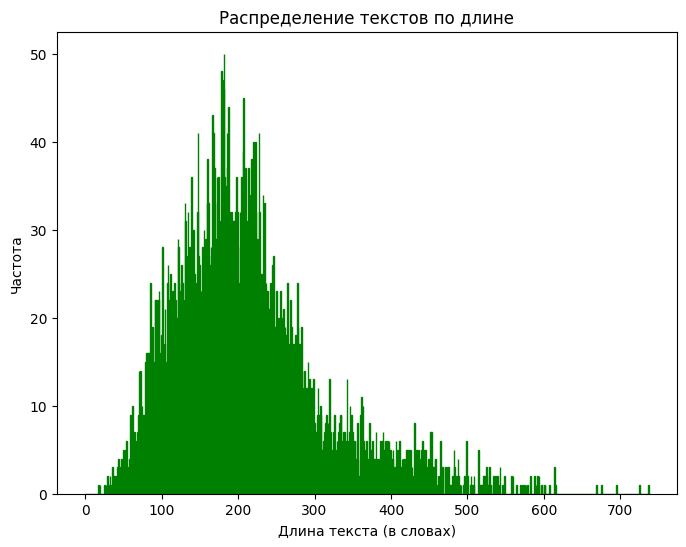

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(df['text_length'], bins=range(0, df['text_length'].max() + 1), edgecolor='green')
plt.xlabel('Длина текста (в словах)')
plt.ylabel('Частота')
plt.title('Распределение текстов по длине')
plt.show()

In [22]:
all_text = ''.join(df['text']).replace(" ", "")
char_count = len(all_text)  
char_freq = Counter(all_text)

print(char_freq)

Counter({'e': 1163736, 's': 705242, 'i': 692217, 'a': 672348, 'n': 664150, 't': 659167, 'o': 601297, 'r': 572503, 'l': 490884, 'c': 411543, 'd': 329356, 'u': 293873, 'p': 261067, 'g': 248509, 'm': 235307, 'h': 189408, 'y': 151267, 'v': 142412, 'f': 137731, 'w': 101149, 'b': 97673, 'k': 77148, 'x': 29585, 'j': 11827, 'q': 8840, 'z': 8412, '0': 6031, '1': 4766, '2': 3622, '9': 2379, '3': 1849, '5': 1837, '7': 1555, '4': 1423, '8': 1372, '6': 1333})


In [23]:
all_words = ' '.join(df['text'])
words = all_words.split()

In [24]:
word_freq = Counter(words)  
print(word_freq)

Counter({'students': 14235, 'people': 11373, 'would': 10214, 'also': 8872, 'could': 7786, 'cars': 7707, 'car': 7474, 'school': 7459, 'like': 7008, 'venus': 6781, 'one': 6723, 'help': 6715, 'time': 6090, 'electoral': 5892, 'may': 5748, 'make': 5693, 'many': 5492, 'college': 5414, 'system': 5248, 'face': 5231, 'get': 5086, 'life': 4838, 'use': 4539, 'states': 4443, 'driving': 4064, 'work': 4052, 'think': 3971, 'way': 3886, 'even': 3865, 'facial': 3796, 'new': 3775, 'vote': 3627, 'better': 3604, 'usage': 3579, 'student': 3563, 'technology': 3539, 'need': 3483, 'cities': 3415, 'world': 3366, 'mars': 3257, 'us': 3233, 'take': 3220, 'learning': 3191, 'important': 3146, 'transportation': 3083, 'conclusion': 3054, 'facs': 3017, 'good': 2998, 'dont': 2954, 'carfree': 2942, 'however': 2887, 'know': 2838, 'believe': 2792, 'potential': 2777, 'driverless': 2748, 'able': 2746, 'phones': 2737, 'public': 2651, 'learn': 2647, 'want': 2635, 'different': 2610, 'human': 2595, 'benefits': 2595, 'example': 

In [25]:
bigrams = nltk.ngrams(words, 2)

bigram_freq = Counter([' '.join(bigram) for bigram in bigrams])

In [26]:
bigram_freq

Counter({'electoral college': 4786,
         'car usage': 3155,
         'driverless cars': 2237,
         'limiting car': 2125,
         'carfree cities': 1752,
         'popular vote': 1663,
         'face mars': 1634,
         'facial expressions': 1438,
         'seagoing cowboys': 1432,
         'facial action': 1215,
         'action coding': 1175,
         'coding system': 1175,
         'cell phones': 1163,
         'exploring venus': 1143,
         'cowboys program': 1120,
         'air pollution': 1087,
         'public transportation': 1056,
         'united states': 1055,
         'community service': 1048,
         'traffic congestion': 951,
         'studying venus': 804,
         'natural landform': 795,
         'greenhouse gas': 774,
         'many people': 762,
         'cell phone': 742,
         'gas emissions': 738,
         'high school': 684,
         'distance learning': 659,
         'college system': 631,
         'air quality': 629,
         'students may': 6

In [27]:
trigrams = nltk.ngrams(words, 3)

trigram_freq = Counter([' '.join(trigram) for trigram in trigrams])

In [28]:
trigram_freq

Counter({'limiting car usage': 2063,
         'facial action coding': 1162,
         'action coding system': 1119,
         'seagoing cowboys program': 1114,
         'greenhouse gas emissions': 721,
         'electoral college system': 622,
         'advantages limiting car': 418,
         'venus worthy pursuit': 402,
         'cowboy rode waves': 383,
         'challenge exploring venus': 372,
         'coding system facs': 371,
         'studying venus worthy': 344,
         'alternative modes transportation': 332,
         'pursuit despite dangers': 331,
         'limit car usage': 330,
         'car usage help': 314,
         'worthy pursuit despite': 311,
         'reduce traffic congestion': 308,
         'use cell phones': 305,
         'reducing car usage': 302,
         'popular vote system': 287,
         'president united states': 255,
         'improve air quality': 252,
         'number cars road': 246,
         'join seagoing cowboys': 243,
         'car usage also': 226

In [29]:
words_token = nltk.word_tokenize(all_words)

In [30]:
pos_tags = nltk.pos_tag(words_token, lang='eng')

pos_counts = Counter(tag for word, tag in pos_tags)

print(pos_counts)

Counter({'NN': 411697, 'JJ': 248083, 'NNS': 218814, 'VBP': 85718, 'VBG': 84688, 'RB': 79573, 'VB': 51023, 'VBD': 35875, 'VBZ': 28885, 'MD': 28006, 'IN': 24712, 'VBN': 24442, 'CD': 20532, 'JJR': 8682, 'RBR': 4409, 'DT': 3960, 'PRP': 3462, 'JJS': 3054, 'RP': 774, 'CC': 757, 'FW': 551, 'TO': 291, 'WDT': 243, 'NNP': 236, 'WRB': 167, 'RBS': 147, 'WP': 108, 'UH': 58, 'WP$': 49, '$': 44, 'PRP$': 31, 'POS': 20, 'EX': 10, 'NNPS': 7, 'SYM': 5, "''": 2, 'PDT': 1})


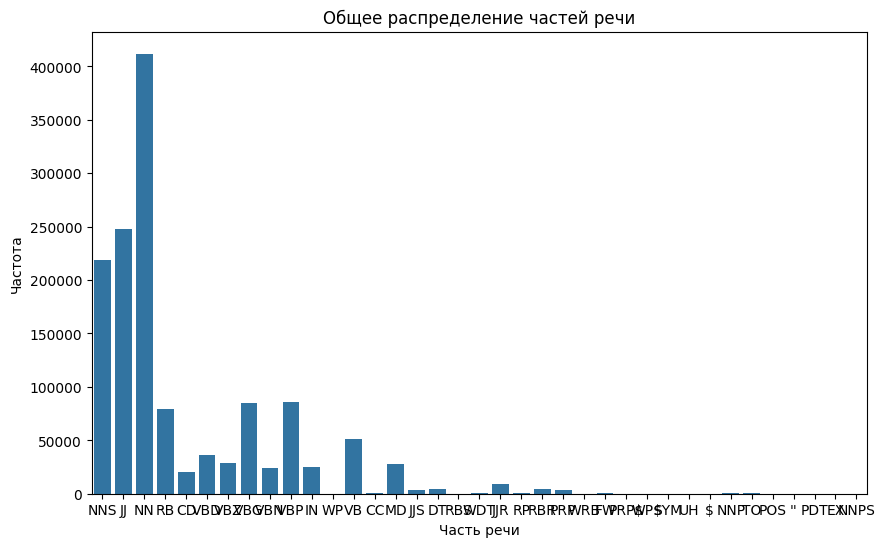

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pos_counts.keys(), y=pos_counts.values())
plt.title("Общее распределение частей речи")
plt.xlabel("Часть речи")
plt.ylabel("Частота")
plt.show()

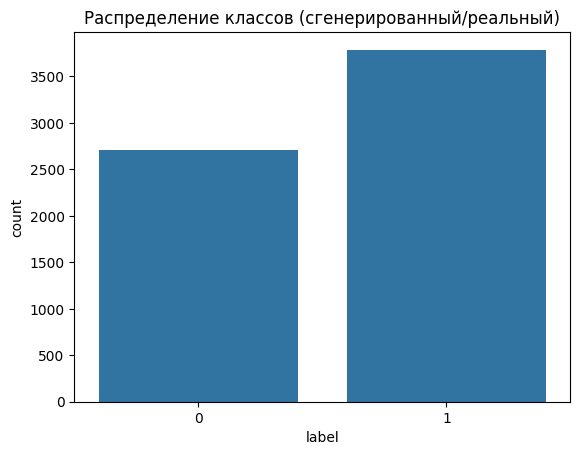

In [32]:
sns.countplot(data=df, x='label')
plt.title("Распределение классов (сгенерированный/реальный)")
plt.show()

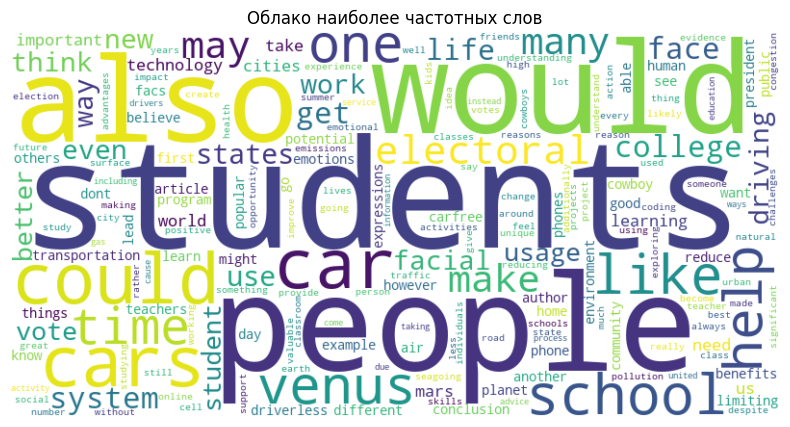

In [33]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Облако наиболее частотных слов")
plt.show()

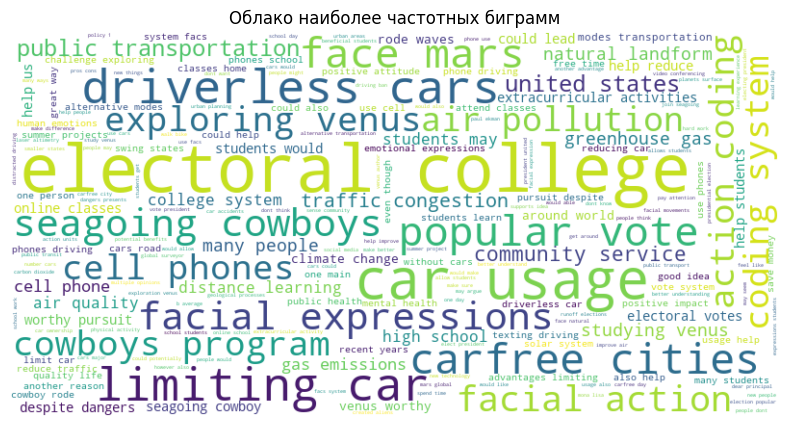

In [34]:
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_freq)
plt.figure(figsize=(10, 5))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Облако наиболее частотных биграмм")
plt.show()

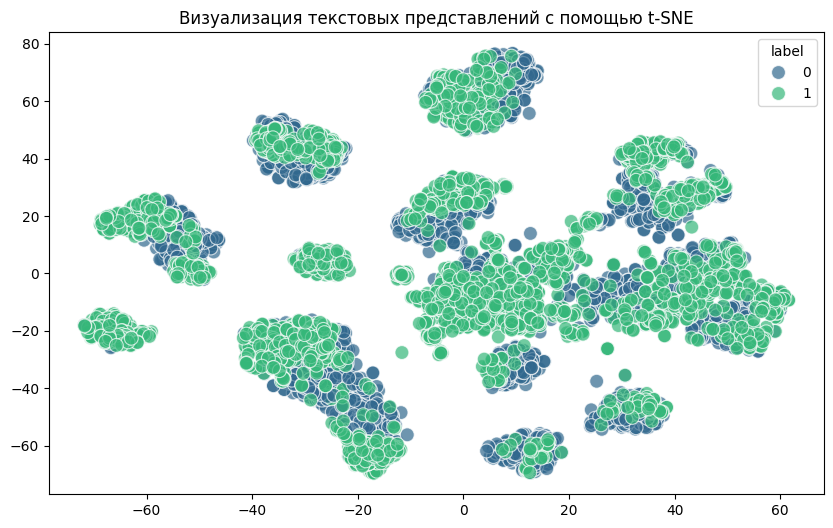

In [35]:
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['text']).toarray()

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['label'], palette='viridis', s=100, alpha=0.7)
plt.title("Визуализация текстовых представлений с помощью t-SNE")
plt.show()

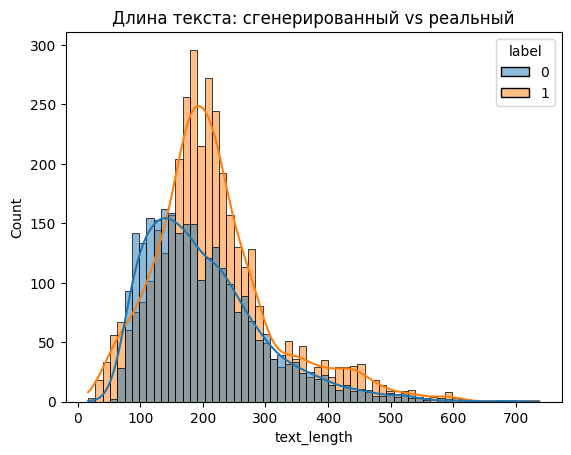

In [36]:
sns.histplot(data=df, x='text_length', hue='label', kde=True)
plt.title("Длина текста: сгенерированный vs реальный")
plt.show()

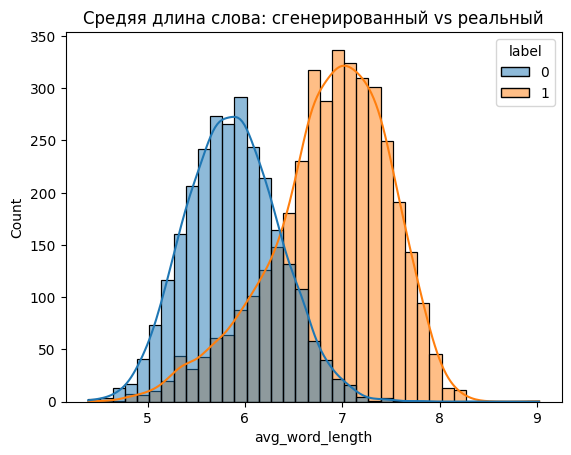

In [44]:
sns.histplot(data=df, x='avg_word_length', hue='label', kde=True)
plt.title("Средяя длина слова: сгенерированный vs реальный")
plt.show()

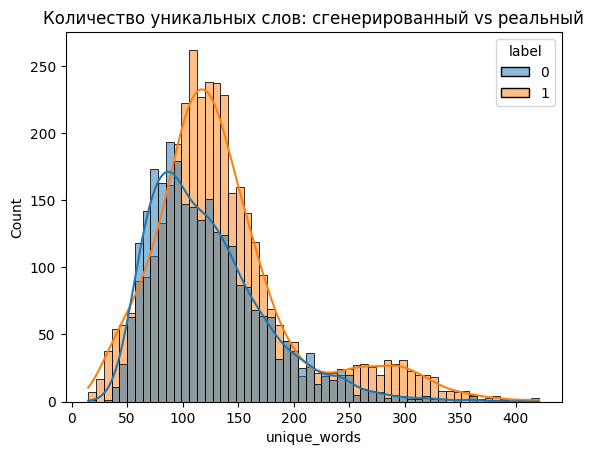

In [45]:
sns.histplot(data=df, x='unique_words', hue='label', kde=True)
plt.title("Количество уникальных слов: сгенерированный vs реальный")
plt.show()

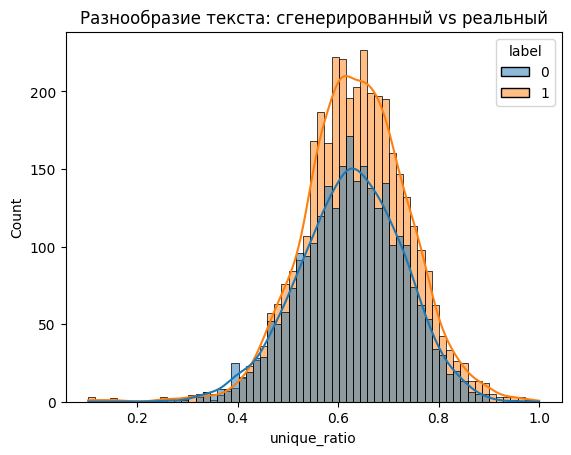

In [46]:
sns.histplot(data=df, x='unique_ratio', hue='label', kde=True)
plt.title("Разнообразие текста: сгенерированный vs реальный")
plt.show()

In [40]:
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer("english")
stems = [snowball.stem(word) for word in words_token]

In [41]:
stems

['phone',
 'modern',
 'human',
 'today',
 'alway',
 'phone',
 'alway',
 'phone',
 '5',
 'hour',
 'day',
 'stop',
 'text',
 'back',
 'forward',
 'group',
 'chat',
 'social',
 'media',
 'even',
 'drive',
 'realli',
 'bad',
 'consequ',
 'stuff',
 'happen',
 'come',
 'phone',
 'certain',
 'area',
 'unit',
 'state',
 'ban',
 'phone',
 'class',
 'room',
 'peopl',
 'phone',
 'know',
 'certain',
 'app',
 'app',
 'like',
 'facebook',
 'twitter',
 'instagram',
 'snapchat',
 'like',
 'friend',
 'move',
 'away',
 'want',
 'contact',
 'still',
 'contact',
 'post',
 'video',
 'text',
 'messag',
 'peopl',
 'alway',
 'differ',
 'way',
 'communic',
 'phone',
 'phone',
 'chang',
 'due',
 'generat',
 'drive',
 'one',
 'way',
 'get',
 'around',
 'peopl',
 'alway',
 'phone',
 'caus',
 'serious',
 'problem',
 'that',
 'there',
 'thing',
 'that',
 'call',
 'text',
 'drive',
 'that',
 'realli',
 'import',
 'thing',
 'rememb',
 'peopl',
 'still',
 'think',
 'stupid',
 'matter',
 'still',
 'obey',
 'that',
 'wa

In [42]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

lemmas = [lemmatizer.lemmatize(word) for word in words_token]

In [43]:
lemmas

['phone',
 'modern',
 'human',
 'today',
 'always',
 'phone',
 'always',
 'phone',
 '5',
 'hour',
 'day',
 'stop',
 'text',
 'back',
 'forward',
 'group',
 'chat',
 'social',
 'medium',
 'even',
 'driving',
 'really',
 'bad',
 'consequence',
 'stuff',
 'happens',
 'come',
 'phone',
 'certain',
 'area',
 'united',
 'state',
 'ban',
 'phone',
 'class',
 'room',
 'people',
 'phone',
 'know',
 'certain',
 'apps',
 'apps',
 'like',
 'facebook',
 'twitter',
 'instagram',
 'snapchat',
 'like',
 'friend',
 'move',
 'away',
 'want',
 'contact',
 'still',
 'contact',
 'posting',
 'video',
 'text',
 'message',
 'people',
 'always',
 'different',
 'way',
 'communicate',
 'phone',
 'phone',
 'changed',
 'due',
 'generation',
 'driving',
 'one',
 'way',
 'get',
 'around',
 'people',
 'always',
 'phone',
 'cause',
 'serious',
 'problem',
 'thats',
 'there',
 'thing',
 'thats',
 'called',
 'texting',
 'driving',
 'thats',
 'really',
 'important',
 'thing',
 'remember',
 'people',
 'still',
 'think',
 